<a href="https://colab.research.google.com/github/artbbs/arfernan/blob/main/IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#ENGENHARIA DE ATRIBUTOS

import scipy.stats as stats #coletar estatísticas
import numpy as np # computação científica
import pandas as pd # processamento de dados
import matplotlib.pyplot as plt # visualização de dados
import seaborn as sns # visualização de dados

In [33]:
#lê e carrega os dados em memoria
url_dados = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
colunas = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
           'marital-status', 'occupation', 'relationship', 'race', 'sex', 
           'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
           'income']
dados = pd.read_csv(url_dados, header=None, sep=',', na_values=[' ?', '?', '? '],
                    names=colunas)

In [34]:
#Exibe as primeiras linhas do conjunto de dados
dados.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
#Exibe informações sobre conjunto de dados carregado
#Observamos: volume de dados, nome das colunas, tipode de dados e dados faltando
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [36]:
#ELIMINACAO DE ATRIBUTOS
#Remove o atributo 'fnlwgt'
dados.drop('fnlwgt', axis=1, inplace=True)
#remove o atributo 'relationship'
dados2 = dados.drop('relationship', axis=1, inplace=False)

In [37]:
dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


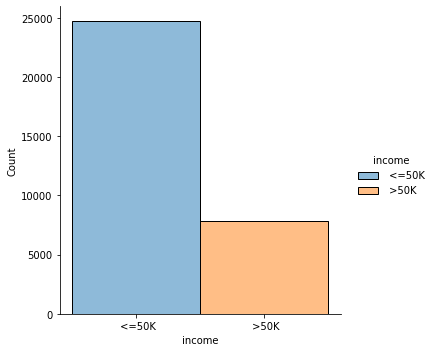

In [38]:
#Plota a dristribuição de classes
sns.displot(dados, x="income", hue="income")
plt.show()

In [39]:
#Divide o conjunto de dados pelas duas classes
class_menor50 = dados[dados['income'] == ' <=50K']
class_maior50 = dados[dados['income'] == ' >50K']
#Exibe a quantidade de dados por classe
print("<=50K:", len(class_menor50))
print(">50K :", len(class_maior50))

<=50K: 24720
>50K : 7841


In [40]:
#Equilibra a classe majoritária (<=50)
#conforme o tamanho da classe minoritária (>50)
nova_class_menor50 = class_menor50.sample(len(class_maior50))
novos_dados = pd.concat([nova_class_menor50, class_maior50], axis=0)
novos_dados.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
17203,33,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,0,30,United-States,<=50K
17015,72,NaN,Bachelors,13,Separated,NaN,Not-in-family,White,Female,991,0,7,United-States,<=50K
18659,29,Federal-gov,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Black,Male,0,0,40,United-States,<=50K
10352,35,Private,Assoc-voc,11,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,45,United-States,<=50K
20998,38,Local-gov,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,20,United-States,<=50K


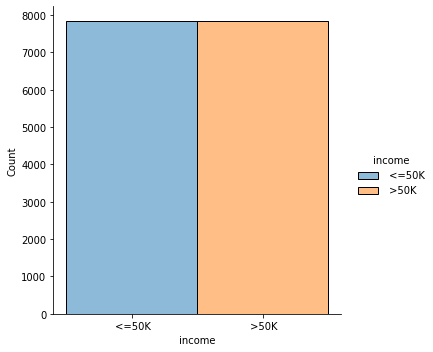

In [41]:
#Plota a nova distribuição de classes
sns.displot(novos_dados, x="income", hue="income")
plt.show()

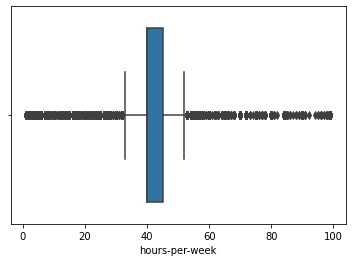

In [42]:
#TRATAMENTO DE DADOS RUIDOSOS
#Identificando ruído no atributo 'hours-per-week'
sns.boxplot(data=dados, x="hours-per-week")
plt.show()

In [43]:
#Identifica os objetos ruidosos no conjunto de dados
x = stats.zscore(dados['hours-per-week'])
print("Ruídos: ", len(dados[np.abs(x) > 3]))

Ruídos:  440


In [44]:
#Substitui o valor ruidoso pelo valor médio do atributo
dados.loc[np.abs(x) > 3, 'hours-per-week'] = int(np.mean(dados['hours-per-week']))

In [45]:
#Transforma os valores nominais do atributo binário 'income' em valores numéricos
dados['income-num'] = dados['income'].map({" <=50K": 0, " >50K": 1})
dados.head(10)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income-num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K,1


In [46]:
#Transforma os valores nominais do atributo binário 'iracencome' em valores numérico
trans_dados = pd.get_dummies(dados[['race']])
trans_dados = pd.concat([dados['race'], trans_dados], axis=1)
trans_dados.head()

,race,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,White,0,0,0,0,1
1,White,0,0,0,0,1
2,White,0,0,0,0,1
3,Black,0,0,1,0,0
4,Black,0,0,1,0,0


In [47]:
#Transforma os valores numéricos do atributo 'education-num' em valores nominais
dados['education-num-nominal'] = dados['education-num'].map(
                            {1:'Preschool',
                             2: '1st-4th',
                             3: '5th-6th',
                             4: '7th-8th',
                             5: '9th',
                             6: '10th',
                             7: '11th',
                             8: '12th',
                             9: 'HS-grad',
                            10: 'Some-college',
                            11: 'Assoc-voc',
                            12: 'Assoc-acdm',
                            13: 'Bachelors',
                            14: 'Masters',
                            15: 'Prof-school',
                            16: 'Dostorate'})
dados[['education', 'education-num', 'education-num-nominal']].head()

,education,education-num,education-num-nominal
0,Bachelors,13,Bachelors
1,Bachelors,13,Bachelors
2,HS-grad,9,HS-grad
3,11th,7,11th
4,Bachelors,13,Bachelors


In [48]:
#biblioteca Featuretools  -  automatizar a engenharia de atributos
# - Open source
# - Pode usar junto com o pandas
# - Atributos significantes em pouco tempo.

In [49]:
#TÉCNICAS DE REAMOSTRAGEM

In [50]:
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression #modelo de regressao
from sklearn.metrics import accuracy_score #acurácia
from sklearn.model_selection import train_test_split #amostragem holdout
from sklearn.model_selection import KFold #amostragem validação cruzada

In [51]:
#Carrega os dados em memória e
#Separa os dados em entrada e saída (x, y)
wine = datasets.load_wine()
x = wine.data
y = wine.target

In [52]:
print("# linhas : ", x.shape[0])
print("# colunas: ", x.shape[1])
print("# classes: ", len(np.unique(y)))

# linhas :  178
# colunas:  13
# classes:  3


In [53]:
#separa a entrada/saída em subconjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [54]:
print("Treinamento (60%): ", len(x_train))
print("      Teste (40%): ", len(x_test))

Treinamento (60%):  106
      Teste (40%):  72


In [55]:
#Realiza a aprendizagem sobre o subconjunto de treinamento
clf = LogisticRegression(solver='liblinear')
clf.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [56]:
#Classifica os dados não-vists no subconjunto de teste
y_pred = clf.predict(x_test)

In [57]:
#Compara resultado reais e preditos
print("Acurácia: %.2f" % accuracy_score(y_test, y_pred))

Acurácia: 0.93


In [62]:
acc = []

#Realiza a aprendizagem por validação cruzada
Kf = KFold(n_splits=5)

for train_index, test_index in Kf.split(x):
  #Constroi os subconjuntos de treinamento/teste para cada partição
  x_train, y_train = x[train_index], y[train_index]
  x_test, y_test = x[test_index], y[test_index]

  #Realiza a aprendizagem sobre o conjunto de treinamento
  #clf = DummyClassifier(strategy="prior", random_state=42)
  clf = LogisticRegression(solver='liblinear')
  clf.fit(x_train, y_train)

  #Classidica os dados não-vistos no subconjunto
  y_pred = clf.predict(x_test)

  #Calcula e armazena a acurácia do modelo atual
  acc.append(accuracy_score(y_test, y_test))

In [61]:
print("Acurácia: %.2f +- %.2f" % (np.mean(acc), np.std(acc)))

Acurácia: 1.00 +- 0.00
